## Data Preparation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/fake_reg.csv')
data.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

Obviously, this is a regression problem.

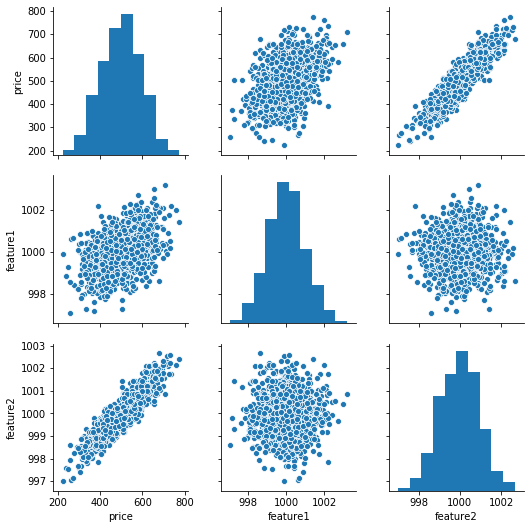

In [6]:
sns.pairplot(data)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X = data[['feature1', 'feature2']].values
Y = data['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential([
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

In [27]:
# this way is same as the previous one, but here it is much easier to comment a line of code
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [28]:
model.compile(optimizer='rmsprop', loss='mse')

In [29]:
type(Y_train)

numpy.ndarray

In [30]:
model.fit(X_train, Y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 2s 3ms/sample - loss: 256285.4913
Epoch 2/100
750/750 [==============================] - 0s 198us/sample - loss: 255974.6147
Epoch 3/100
750/750 [==============================] - 0s 249us/sample - loss: 255593.1068 - loss: 255054.
Epoch 4/100
750/750 [==============================] - 0s 278us/sample - loss: 255144.3417
Epoch 5/100
750/750 [==============================] - 0s 224us/sample - loss: 254604.0507
Epoch 6/100
750/750 [==============================] - 0s 203us/sample - loss: 253964.2686
Epoch 7/100
750/750 [==============================] - 0s 221us/sample - loss: 253202.0312
Epoch 8/100
750/750 [==============================] - 0s 232us/sample - loss: 252312.6767
Epoch 9/100
750/750 [==============================] - 0s 238us/sample - loss: 251283.8905
Epoch 10/100
750/750 [==============================] - 0s 239us/sample - loss: 250095.9708
Epoch 11/100
750/750 [==============================] 

750/750 [==============================] - 0s 242us/sample - loss: 611.8023
Epoch 91/100
750/750 [==============================] - 0s 195us/sample - loss: 587.1877
Epoch 92/100
750/750 [==============================] - 0s 185us/sample - loss: 557.5892
Epoch 93/100
750/750 [==============================] - 0s 192us/sample - loss: 528.6617
Epoch 94/100
750/750 [==============================] - 0s 229us/sample - loss: 502.3186
Epoch 95/100
750/750 [==============================] - 0s 193us/sample - loss: 478.5022
Epoch 96/100
750/750 [==============================] - 0s 192us/sample - loss: 451.4727
Epoch 97/100
750/750 [==============================] - 0s 179us/sample - loss: 426.7052
Epoch 98/100
750/750 [==============================] - 0s 189us/sample - loss: 398.0772
Epoch 99/100
750/750 [==============================] - 0s 215us/sample - loss: 378.7963
Epoch 100/100
750/750 [==============================] - 0s 220us/sample - loss: 357.5321


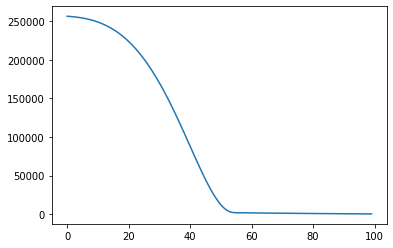

In [39]:
plt.plot(pd.DataFrame(model.history.history))